In [25]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
import pandas as pd
from mpl_toolkits import mplot3d

# plt.rcParams["figure.figsize"] = [12, 9]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,sinh,cosh,exp,log,pi,sqrt,array,linspace,arange,meshgrid

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


## Announcements

  - Midterm 1 Thursday 10/15
    - on Gradescope
    - 90 minute time limit
    - Test upload beforehand
    - Save as you go
    - available 0600–2400
  - HW 6 posted today, due 10/20
    

<p style="padding-bottom:40%;"> </p>


# One-minute Review

The **chain rule** for a differentiable function $f:\RR^n \to \RR$ and a differentiable curve $\vec r:\RR\to\RR^n$ is  $$ \frac{d}{dt} f\circ \vec r(t) = \nabla f (\vec r(t))\cdot \vec r'(t)$$

where $\nabla f = \langle f_{x_1}, \cdots, f_{x_n} \rangle$. 

<p style="padding-bottom:40%;"> </p>

# Lecture 11

  - Objectives
    - Define directional derivatives.
    - Compute $D_\vec u f$ using the gradient.
    - Use the properties of $\nabla f$ to compute tangent spaces and the like.
    
  - Resources
    - Content
      - Stewart: §14.6
      - New Strang: [§4.6](https://cnx.org/contents/oxzXkyFi@6.1:gkQNvJr6@7/4-6-Directional-Derivatives-and-the-Gradient)
      - [Slides](https://e2000.columbiajupyter2.org/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fdrewyoungren%2Fmvc-sp20&urlpath=tree%2Fmvc-sp20%2Fslide_notebooks%2Fmvc-L11.ipynb) via JupyterHub
    - Practice
      - Mooculus: [The Gradient](https://ximera.osu.edu/mooculus/calculus3/interpretingTheGradient/digInGradient)
    - Extras
      - CalcBLUE: [Gradients](https://www.youtube.com/watch?v=zEvGUXXW1BI&list=PL8erL0pXF3JZZTnqjginERYYEi1WpLE_V&index=58) 

# Directional Derivatives

Partial derivatives give rates of change in coordinate directions, but what of the (infinite) other directions in which a function is changing?

#### Fundamental example

Given an elevation map, the partial derivatives give slopes in the cardinal directions, but we want to know how the terrain is changing as we head northeast, or, perhaps, which direction has the steepest climb?

![Topographic map example](adiron.png)


## Definition

Let $\vec u$ be a _unit vector_. The **directional derivative** of $f$ at $\vec x$ in the direction $\vec u$ is $$D_\vec u f(\vec x) = \lim_{h \to 0}\frac{f(\vec x+ h\vec u) - f(\vec x)}{h}.$$

<p style="padding-bottom:40%;"> </p>

### Use the Chain Rule. 

Let $\vec r(h) = \vec x + h\vec u$. Then $$D_\vec u f(\vec x) = (f\circ \vec r)'(0)$$

$$= \nabla f(\vec r(0))\cdot \vec r'(0)$$

$$= \nabla f(\vec x)\cdot \vec u.$$

<p style="padding-bottom:40%;"> </p>

## Example

Find the directional derivative of the function $$f(x,y) = e^{y-x^2}$$ at the point $(1,0)$ in the direction of $\langle -1,1\rangle$.

In [43]:
f = lambda x,y: exp(y-x**2)
u0 = np.arccos(-2/sqrt(5))

@interact(u=(u0-pi,u0+pi,pi/12))
def _(func=fixed(f),angle=(-90,120,6),vangle=(0,90,6),u=3*pi/4):
    fig = plt.figure(figsize = (12,6))
    ax = fig.add_subplot(121,projection='3d')
    ax.view_init(vangle,angle)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    x =  np.linspace(-3/2,3/2,601)
    y =  np.linspace(-3/2,3/2,301)    
    X,Y = np.meshgrid(x,y)
    Z = func(X,Y)
    ax.plot_surface(X,Y,Z,alpha=.6,cmap='ocean',rcount=50,ccount=50);
#     ax.quiver([1,1],[0,0],[0,0],[-2/exp(1),-1/sqrt(2)],[1/exp(1),1/sqrt(2)],[0,0],lw=3,color='r',alpha=1)
    ax2 = fig.add_subplot(122)
    cp = ax2.contour(X,Y,Z,cmap='ocean',levels = np.arange(1/exp(1)-.2,3,.2))
    ax2.set_xlabel("$x$",size=16)
    ax2.set_ylabel("$y$",size=16)
    ax2.clabel(cp,fmt="%.1f")
    ax2.quiver([1,1],[0,0],[-2/exp(1),cos(u)],[exp(-1),sin(u)],lw=3,color=['r','b'],alpha=1,angles='xy', scale_units='xy', scale=1)

    s = np.linspace(0,20,100)
    s = np.array([tt for tt in s if (np.abs(tt*cos(u)+1) <= 3/2) and (np.abs(tt*sin(u)) <= 3/2)])
    ax.plot(s*cos(u)+1,s*sin(u),func(s*cos(u)+1,s*sin(u)),lw=3,ls='--',color='k')
    ax2.plot(s*cos(u)+1,s*sin(u),lw=2,ls='--',color='k')
    ax.plot(s*cos(u)+1,s*sin(u),exp(-1) + s*(sin(u)*exp(-1)-2*cos(u)*exp(-1)),lw=3,color='b')
    ax.scatter(1,0,exp(-1))
    ax.set_xlim3d([-3/2,3/2])
    ax.set_ylim3d([-3/2,3/2])
    ax.set_zlim3d([0,4])
    ax2.set_title(r"$D_{\vec u} f = $" + ("%.3f" % (sin(u)*exp(-1)-2*cos(u)*exp(-1),)))
#     ax2.plot((pi/2-t)/pi*4,dz/dt*(t-t[pt])+Z[pt])
#     ax2.set_ylim([0,1])

interactive(children=(IntSlider(value=12, description='angle', max=120, min=-90, step=6), IntSlider(value=42, …

In [ ]:
e = exp(1)
u = array((-1,1))/sqrt(2)
gradf = array((-2/e,1/e))
np.dot(gradf,u)

In [ ]:
norm(gradf)

<p style="padding-bottom:40%;"> </p>

### Some questions

In [4]:
f = lambda x,y: exp(y-x**2)
u0 = np.arccos(-2/sqrt(5))

@interact
def _(func=fixed(f),angle=(-90,120,6),vangle=(0,90,6),u=(u0-pi,u0+pi,pi/12)):
    fig = plt.figure(figsize = (12,6))
    ax = fig.add_subplot(121,projection='3d')
    ax.view_init(vangle,angle)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    x =  np.linspace(-3/2,3/2,601)
    y =  np.linspace(-3/2,3/2,301)    
    X,Y = np.meshgrid(x,y)
    Z = func(X,Y)
    ax.plot_surface(X,Y,Z,alpha=.6,cmap='ocean',rcount=50,ccount=50);
#     ax.quiver([1,1],[0,0],[0,0],[-2/exp(1),-1/sqrt(2)],[1/exp(1),1/sqrt(2)],[0,0],lw=3,color='r',alpha=1)
    ax2 = fig.add_subplot(122)
    cp = ax2.contour(X,Y,Z,cmap='ocean',levels = np.arange(1/exp(1)-.2,3,.2))
    ax2.set_xlabel("$x$",size=16)
    ax2.set_ylabel("$y$",size=16)
    ax2.clabel(cp,fmt="%.1f")
    ax2.quiver([1,1],[0,0],[-2/exp(1),cos(u)],[exp(-1),sin(u)],lw=3,color=['r','b'],alpha=1,angles='xy', scale_units='xy', scale=1)

    s = np.linspace(0,20,100)
    s = np.array([tt for tt in s if (np.abs(tt*cos(u)+1) <= 3/2) and (np.abs(tt*sin(u)) <= 3/2)])
    ax.plot(s*cos(u)+1,s*sin(u),func(s*cos(u)+1,s*sin(u)),lw=3,ls='--',color='k')
    ax2.plot(s*cos(u)+1,s*sin(u),lw=2,ls='--',color='k')
    ax.plot(s*cos(u)+1,s*sin(u),exp(-1) + s*(sin(u)*exp(-1)-2*cos(u)*exp(-1)),lw=3,color='b')
    ax.scatter(1,0,exp(-1))
    ax.set_xlim3d([-3/2,3/2])
    ax.set_ylim3d([-3/2,3/2])
    ax.set_zlim3d([0,4])
    ax2.set_title(r"$D_{\vec u} f = $" + ("%.3f" % (sin(u)*exp(-1)-2*cos(u)*exp(-1),)))
#     ax2.plot((pi/2-t)/pi*4,dz/dt*(t-t[pt])+Z[pt])
#     ax2.set_ylim([0,1])

interactive(children=(IntSlider(value=12, description='angle', max=120, min=-90, step=6), IntSlider(value=42, …

  1. Must there always be a direction $\vec u$ such that $D_\vec u f = 0$?

  2. What is $D_{-\vec u} f$?

  3. What if $D_{\vec u} f = 1$ in all directions $\vec u$?
  
  ![Plot of cone](cone.png)
 

# Properties of the gradient 

## Nota Bene: This is essential stuff

The gradient vector packs in a *ton* of information about how a function is changing.

### 1. The gradient is orthogonal to level sets.

### 2. It points in the direction of greatest change.

### 3. Its magnitude is the amount of greatest change.

<p style="padding-bottom:40%;"> </p>

### 1. The gradient is orthogonal to level sets.

<p style="padding-bottom:40%;"> </p>

Suppose $\langle x(t),y(t) \rangle$ is a smooth curve **inside a level set** $f(x,y) = c$ of a differentiable function $f$.

We compute $$\frac {d}{dt} f(x(t),y(t)) = 0 $$ 

$$ f_x(x(t),y(t)) x'(t) + f_y(x(t),y(t)) y'(t) = 0$$


$$= \nabla f \cdot \begin{bmatrix} x'(t) \\ y'(t) \end{bmatrix} = 0$$

Note this second vector is tangent to the level set (a curve here). This gives us the result.

#### Example

Plot several vectors perpendicular to the surface $x^2 + y^2 = 1 + z^2$.

In [36]:
s = linspace(0,2*pi,100)
t = linspace(-1,1,100)
s,t = meshgrid(s,t)
X = cosh(t)*cos(s)
Y = cosh(t)*sin(s)
Z = sinh(t)

s = linspace(0,2*pi,10)
t = linspace(-1,1,10)
s,t = meshgrid(s,t)
U = cosh(t)*cos(s)
V = cosh(t)*sin(s)
W = sinh(t)

@interact
def _(angle=(-135,120,6)):
    fig = plt.figure(figsize=(6,7))
    ax = fig.gca(projection='3d')
    ax.plot_surface(X,Y,Z,alpha=.8,color=(.7,.2,.2))
#     ax.plot_surface(sqrt(r)*X,sqrt(r)*Y,sqrt(r)*Z,alpha=.6)

    ax.quiver(U,V,W,2*U/5,2*V/5, -2*W/5)
    ax.view_init(30,angle)
    ax.set_zlim(-1.5,1.5)
    
    

interactive(children=(IntSlider(value=-9, description='angle', max=120, min=-135, step=6), Output()), _dom_cla…

<p style="padding-bottom:40%;"> </p>

### 2. It points in the direction of greatest change.

<p style="padding-bottom:40%;"> </p>

Which direction $\vec u$ maximizes $D_\vec u f$?

$$D_\vec u f = \nabla f \cdot \vec u = |\nabla f||\vec u| \cos \theta$$

Since $|\vec u | = 1$, this is maximized when $\theta = 0$. 

In other words, $$\vec u = \frac{\nabla f}{|\nabla f|}$$ the unit vector in the direction of the gradient.

<p style="padding-bottom:40%;"> </p>

### 3. Its magnitude is the amount of greatest change.

<p style="padding-bottom:40%;"> </p>

We simply compute using the above $$D_{\frac{\nabla f}{|\nabla f|}} f = \nabla f \cdot \frac{\nabla f}{|\nabla f|}$$

$$= \frac{|\nabla f|^2}{|\nabla f|} = |\nabla f|.$$

<p style="padding-bottom:40%;"> </p>

## Example

What happens when particle "follows the gradient" of a function?

Suppose you have a swarm of drones equipped with temperature sensors (and GPS, etc.) which are programmed to follow the heat gradient. They are dropped over a forest fire and let go. What will one see?

In [8]:
i = np.array([1,0])
j = np.array([0,1])

def update(pts,f=f,dt=1/100):
    out = []
    for n in range(pts.shape[1]):
        v = pts[:,n] # a point
        z0 = f(*v) # value at the point
        z1 = f(*(v + dt*i)) # value to the right
        z2 = f(*(v + dt*j)) # value above
        out.append(v + np.array([z1-z0,z2-z0])) # approx v + dt * grad(f)
    return np.column_stack(out)

In [20]:
f = lambda x,y: 50*(x+y)*(x-2/3)*(y-2/3)/(1+7*(x-1/2)**4+7*(y-1/2)**4)
pts = 2*np.random.rand(2,100)

pts_track = [pts]
for k in range(100):
    pts_track.append(update(pts_track[-1],f=f,dt=1/500))
pts_track = np.array(pts_track)
pts_track[2,0].shape

x = y = np.linspace(0,2,102)
x,y = np.meshgrid(x,y)
z = f(x,y)

xx = yy = np.linspace(0,2,26)
xx,yy = np.meshgrid(xx,yy)
        
@interact(t=(0,99))
def _(t=0,field=False,f=fixed(lambda x,y: 50*(x+y)*(x-2/3)*(y-2/3)/(1+7*(x-1/2)**4+7*(y-1/2)**4))):
    fig = plt.figure(figsize=(6,6),dpi=100)
    cp = plt.contour(x,y,z,levels=np.arange(-8,8,1),cmap='viridis')
    plt.scatter(pts_track[t,0],pts_track[t,1])
    plt.clabel(cp,fmt="%.f");
    plt.xlim([0,2])
    plt.ylim([0,2])
    if field:
        plt.quiver(xx,yy,f(xx+.01,yy)-f(xx,yy),f(xx,yy+.01) - f(xx,yy))

interactive(children=(IntSlider(value=0, description='t', max=99), Checkbox(value=False, description='field'),…

## Exercises

  1. Find the maximum rate of change of each function at the given point and the direction in which is occurs.
  
    1. $f(x,y) = \frac{y^2}{x}$ at $(4,2)$.
    
_Solution_. $$ \nabla f \Big|_{(4,2)} = \bv{-\frac{y^2}{x^2} \\ 2\frac{y}{x}}\Big|_{(4,2)} = \bv{-1/4 \\ 1} $$
    
So the maximum rate of change is $|\nabla f| = \sqrt{17/16}$ in the direction $\langle -1/\sqrt{17}, 4/\sqrt{17} \rangle$.
  

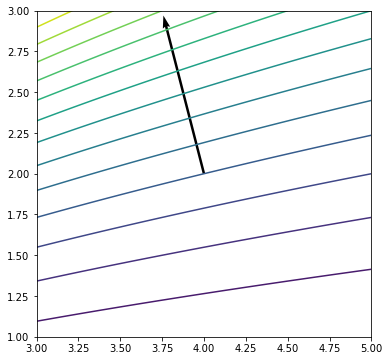

In [24]:
x = linspace(3,5,100)
y = linspace(1,3,100)

plt.figure(figsize=(6,6))
x,y = meshgrid(x,y)
c = plt.contour(x,y,y**2/x,levels=16)
plt.quiver(4,2,-1/sqrt(17),4/sqrt(17),angles='xy', scale_units='xy', scale=1);
# plt.quiver(4,2,-1/4,1,angles='xy', scale_units='xy', scale=1)

  B. $g(x,y,z) = \tan^{-1}(x+2y+3z)$ at $(5,-1,-1)$.
  

_Solution_. There is a trick here. $g$ is a composition of arctan and a linear function. The chain rule says $\nabla f(h(x,y,z)) = f'(h(x,y,z))\nabla h(x,y,z)$. 

This makes life easier as we know $g(5,-1,-1) = 0$,  $\nabla h = \langle 1,2,3 \rangle$, and $f'(x) = \frac{1}{1 + x^2}$.

Thus $\nabla g =\langle 1,2,3 \rangle$ points in the direction of greatest change with the rate of $\sqrt{14}$.

<p style="padding-bottom:40%;"> </p>

  2. Find the equation of the tangent plane to the surface $z+1=x e^y \cos (z)$ at the point $(1,0,0)$.